In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
np.random.seed(42)

In [5]:
#Create 30 employee IDs
employee_ids = [f"EMP_{i:03d}" for i in range (1,31)]
dates = pd.date_range("2025-07-01",periods=30, freq="D")

In [13]:
data = {"Date": np.tile(dates, len(employee_ids)),
 "Employee_ID" : np.repeat(employee_ids, len(dates)),
 "Working_Hours": np.random.uniform(4, 10, size=len(dates)* len(employee_ids)).round(2)
}


In [14]:
df = pd.DataFrame(data)

In [15]:
df.to_csv("employee_working_hours.csv", index=False)

In [16]:
df_csv = pd.read_csv("employee_working_hours.csv")

In [17]:
print(df_csv.head())
print(df_csv.describe())
print(df_csv["Employee_ID"].nunique())

         Date Employee_ID  Working_Hours
0  2025-07-01     EMP_001           6.25
1  2025-07-02     EMP_001           9.70
2  2025-07-03     EMP_001           8.39
3  2025-07-04     EMP_001           7.59
4  2025-07-05     EMP_001           4.94
       Working_Hours
count     900.000000
mean        6.954233
std         1.762088
min         4.030000
25%         5.387500
50%         7.010000
75%         8.490000
max        10.000000
30


In [20]:
total_hours =df_csv.groupby("Employee_ID")["Working_Hours"].sum().sort_values(ascending=False)

In [21]:
avg_daily =df_csv.groupby("Employee_ID")["Working_Hours"].mean()

In [22]:
#Flag unusually low or high working days
threshold_low = 5
threshold_high = 9

In [29]:
df_csv["Low_Hour_Flag"] = df_csv["Working_Hours"] <threshold_low


In [30]:
df_csv["High_Hour_Flag"]=df_csv["Working_Hours"] >threshold_high

In [32]:
print(df_csv[df_csv["Low_Hour_Flag"] |df_csv["High_Hour_Flag"]].head())


         Date Employee_ID  Working_Hours  Low_Hour_Flag  High_Hour_Flag
1  2025-07-02     EMP_001           9.70          False            True
4  2025-07-05     EMP_001           4.94           True           False
5  2025-07-06     EMP_001           4.94           True           False
6  2025-07-07     EMP_001           4.35           True           False
7  2025-07-08     EMP_001           9.20          False            True


In [33]:
import matplotlib.pyplot as plt

In [34]:
import seaborn as sns

In [36]:
top10 = total_hours.head(10)


In [37]:
plt.figure(figsize=(10,5))


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='Employee_ID'>

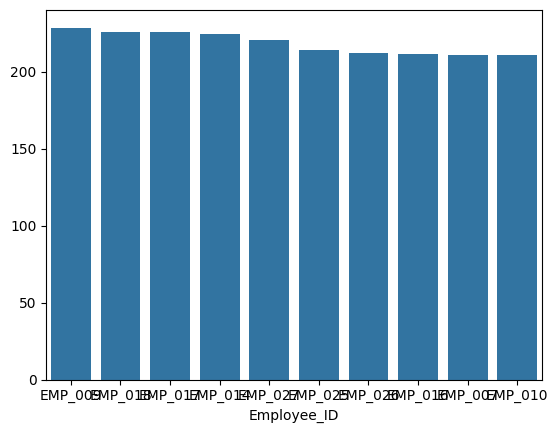

In [38]:
sns.barplot(x=top10.index, y=top10.values)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

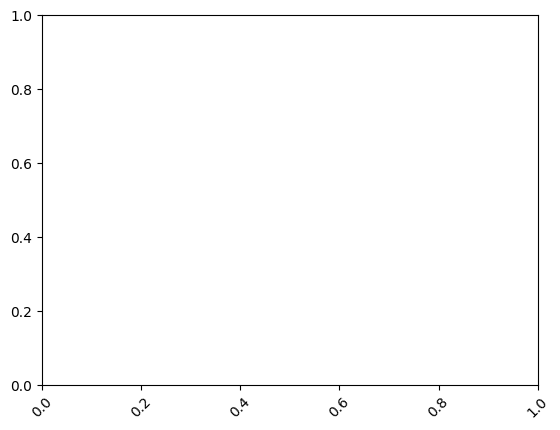

In [39]:
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Top 10 Employees by Total working Hours')

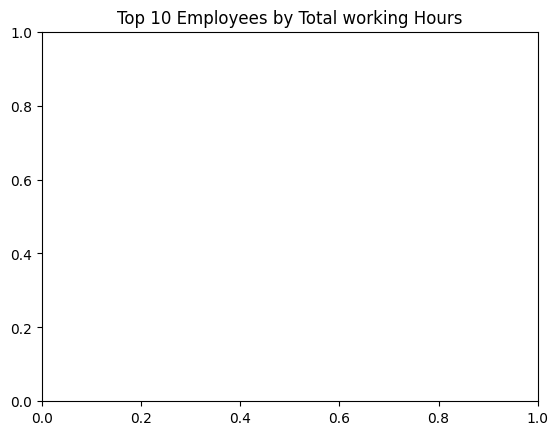

In [40]:
plt.title("Top 10 Employees by Total working Hours")

Text(0, 0.5, 'Hours')

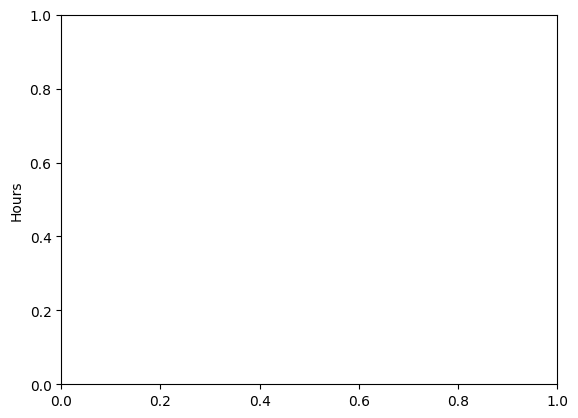

In [43]:
plt.ylabel("Hours")

In [44]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [45]:
plt.show()